In [1]:
#This code is to apply PCA on the Iris Dataset.
#The Iris dataset is a very commonly used and, like the Titanic, is often used in data science
#to introduce some ideas. It even has its own wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set

#We will begin by importing the usual things:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#For this demonstration of PCA to the Iris dataset, we will also need the following:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
#Here we will load in the Iris dataset from an external website.
#There are other ways to get this data, but this approach is something to be aware of. 

website = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(website
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
#If you have a look at the data, you will see it contains a number of variables, along
#with a label to state what kind of Iris the plant is (there are three variations, or targets).

df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Our first step is to standardize the variables -- the features -- within the dataset.
#We will also ensure that our target is the name of the Iris. 

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [6]:
#Now that we've standardized the values of the variables, we will apply the PCA.

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
New_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

New_df

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [7]:
#We will recombine the principal components with the targets now.

Final_df = pd.concat([New_df, df[['target']]], axis = 1)

Final_df

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [8]:
#Let's see how much of the variance is explained.

pca.explained_variance_ratio_


array([0.72770452, 0.23030523])

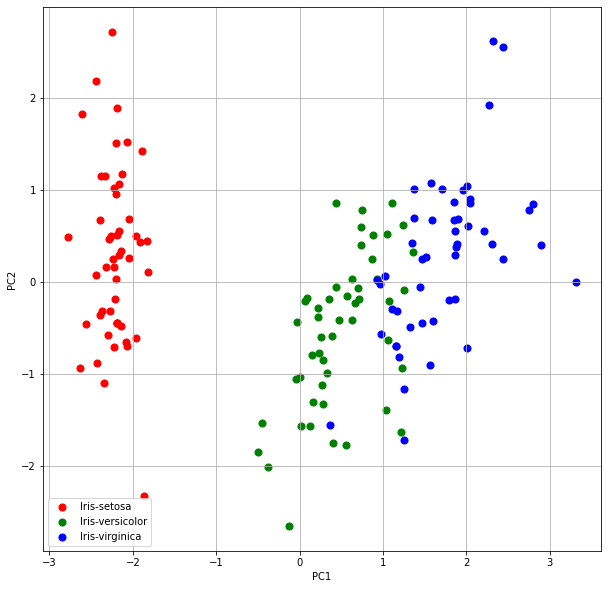

In [9]:
#Let's also visualize the outcome of the PCA.

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = Final_df['target'] == target
    ax.scatter(Final_df.loc[indicesToKeep, 'PC1']
               , Final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [10]:
#Thoughts:
#The Setosa variants are clearly separated now. 
#Although there is still some mixing of the other types, the PCA 
#provides a reasonable way forward here for further analysis.
